## TIME SERIES ARIMA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

In [2]:
df_airline = pd.read_csv(r"C:\Users\harsh\Downloads\airline_passengers.csv")

In [3]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0,inplace=True)

In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


Here month is object type but we need it in datetime type

In [9]:
df_airline['Month']= pd.to_datetime(df_airline['Month'])

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Now we will set month as index

In [12]:
df_airline.set_index('Month',inplace=True)

In [13]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

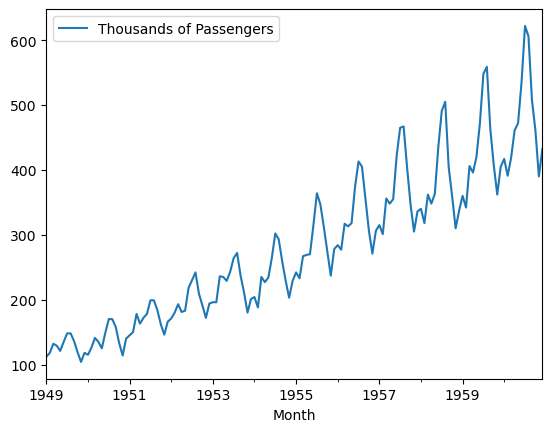

In [14]:
df_airline.plot()

This looks like seasonal data
This is not stationary data
hence using Dekis fuller test to convert into stationary data

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Reject null hypothesis, time series is stationary')
    else:
        print('Accept null hypo, time series is non sationary')

In [18]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060488
p- value: 0.991880243437641
Accept null hypo, time series is non sationary


In [22]:
# Use techniques differencing,Shifting

df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [23]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [24]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700056
p- value: 0.054213290283824704
Accept null hypo, time series is non sationary


In [25]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [26]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468548
p- value: 2.732891850013967e-29
Reject null hypothesis, time series is stationary


In [27]:
# in seasonal data we find it for entire year

df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [28]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
Reject null hypothesis, time series is stationary


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

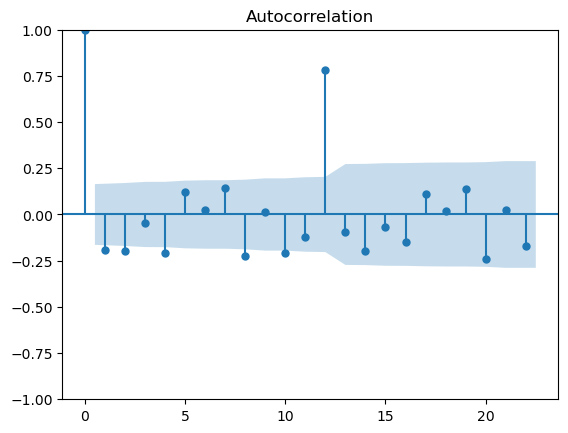

In [32]:
acf = plot_acf(df_airline['Passengers Second Difference'].dropna())
# we find parameter k 
# q=13 in between

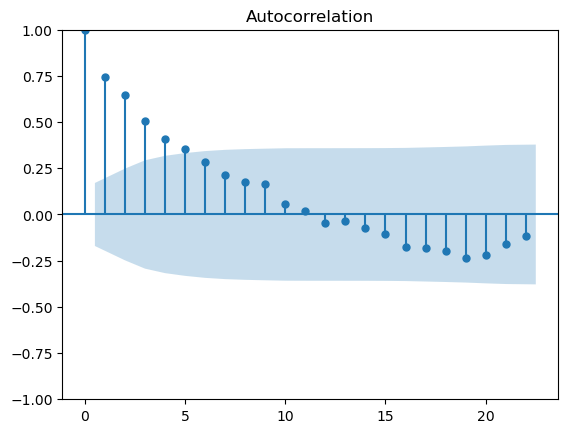

In [33]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())

#q=5  for 0 we dont count

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


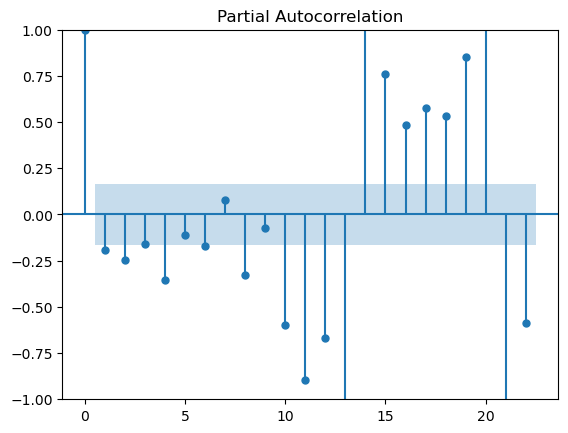

In [31]:
result = plot_pacf(df_airline['Passengers Second Difference'].dropna())

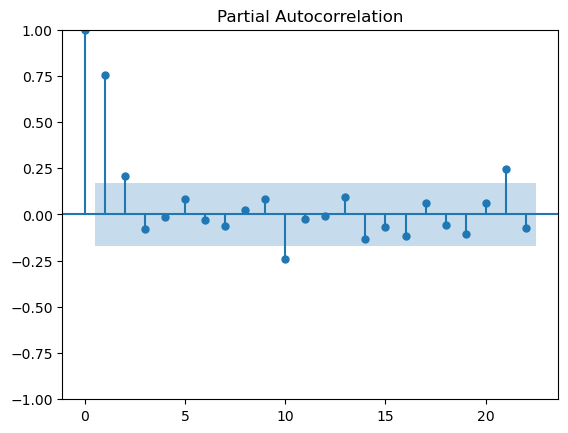

In [34]:
pacf12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())
# first p=2 then p= 10 

PACF performing auto correlation and ACF moving average

In [36]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


Train and test data

In [37]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [38]:
train_data= df_airline[:train_dataset_end]
test_data= df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [39]:
pred_start_date=test_data.index[0]
pred_end_date= test_data.index[-1]

In [40]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


## ARIMA model

In [48]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [52]:
#model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,12))
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

# q is coeff
# see result pass 2 dff graph 
#acf line 12th line most impact

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
model_Arima_fit=model_ARIMA.fit()

In [54]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sat, 17 Feb 2024   AIC                            736.477
Time:                             17:28:04   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

All p value <0.05 all have positive impact

In [55]:
# prediction

pred_start_date=test_data.index[0]
pred_end_date= test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [56]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [57]:
residuals`

Month
1956-01-01    -16.183613
1956-02-01    -32.478356
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544232
1956-06-01     25.077918
1956-07-01     46.979712
1956-08-01     58.432466
1956-09-01     22.879033
1956-10-01     -1.734753
1956-11-01    -40.623911
1956-12-01    -33.828197
1957-01-01    -34.840407
1957-02-01    -55.098234
1957-03-01      5.312175
1957-04-01     -2.080462
1957-05-01     -6.157692
1957-06-01     40.783484
1957-07-01     82.680625
1957-08-01     94.147421
1957-09-01     39.889906
1957-10-01     -9.108923
1957-11-01    -66.293789
1957-12-01    -49.323597
1958-01-01    -52.077839
1958-02-01    -73.405850
1958-03-01    -26.404578
1958-04-01    -43.572856
1958-05-01    -39.448080
1958-06-01     21.744315
1958-07-01     80.146584
1958-08-01     97.329457
1958-09-01      1.513666
1958-10-01    -47.089147
1958-11-01   -108.125314
1958-12-01    -89.012376
1959-01-01    -69.205582
1959-02-01    -85.352231
1959-03-01    -22.150987
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

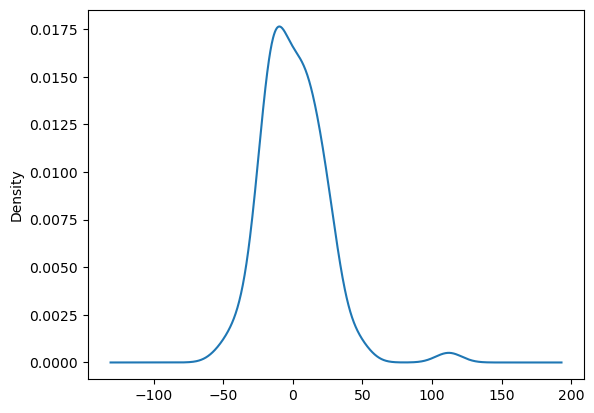

In [58]:
model_Arima_fit.resid.plot(kind='kde')

In [59]:
test_data['Predicted_Arima']=pred

C:\Users\harsh\AppData\Local\Temp\ipykernel_19300\1112607908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Arima']=pred


<AxesSubplot:xlabel='Month'>

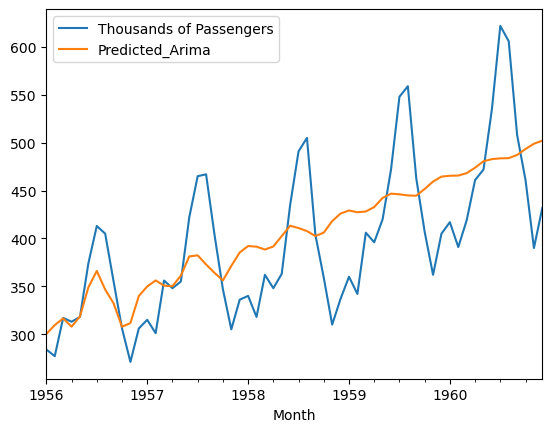

In [61]:
test_data[['Thousands of Passengers','Predicted_Arima']].plot()

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))
# after 5 going down
# seasonal order p,q,d  1 seasoal differencing 12 month data hence 12

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.239
Date:                             Sat, 17 Feb 2024   AIC                            548.479
Time:                                     17:45:19   BIC                            568.969
Sample:                                 01-01-1949   HQIC                           556.636
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5915      0.948      0.624      0.532      -1.266       2.449
ar.L2          0.8321      0.231      3.597      0.000       0.379       1.286
ar.L3         -0.4467      0.903     -0.495      0.621      -2.216       1.322
ma.L1          0.1908      1.222      0.156      0.876      -2.204       2.585
ma.L2         -0.5297      1.317     -0.402      0.688      -3.111       2.052
ma.L3         -0.1001      0.403     -0.249      0.804      -0.889       0.689
ma.L4         -0.1285      0.363     -0.354      0.724      -0.841       0.584
ma.L5          0.2453      0.373      0.658      0.511      -0.485       0.976
sigma2        87.7132     88.019      0.997      0.319     -84.800     260.227
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.04   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
Spred=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
Sresiduals=test_data['Thousands of Passengers']-Spred

In [74]:
Sresiduals

Month
1956-01-01     -2.190719
1956-02-01     -4.295181
1956-03-01      7.059912
1956-04-01      2.277130
1956-05-01      6.603753
1956-06-01     18.974135
1956-07-01      9.512851
1956-08-01     19.825969
1956-09-01      5.438883
1956-10-01     -4.346498
1956-11-01     -1.704526
1956-12-01     -6.587827
1957-01-01     -5.126320
1957-02-01    -13.202480
1957-03-01     13.804821
1957-04-01      5.972193
1957-05-01     12.944266
1957-06-01     37.195783
1957-07-01     32.368406
1957-08-01     53.501415
1957-09-01     26.733234
1957-10-01      9.713062
1957-11-01      5.956464
1957-12-01     -2.210766
1958-01-01     -5.167011
1958-02-01    -20.571530
1958-03-01     -4.002277
1958-04-01    -17.203674
1958-05-01     -1.690595
1958-06-01     28.155202
1958-07-01     36.847594
1958-08-01     70.540928
1958-09-01      6.271263
1958-10-01      1.780076
1958-11-01     -8.499063
1958-12-01    -20.166349
1959-01-01     -3.665839
1959-02-01    -14.597422
1959-03-01     22.408357
1959-04-01     13.6

<AxesSubplot:xlabel='Month'>

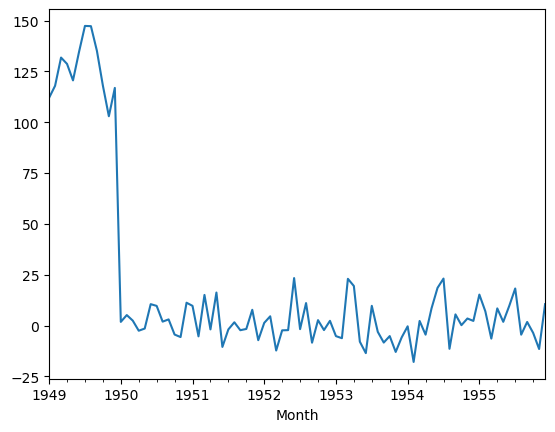

In [78]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

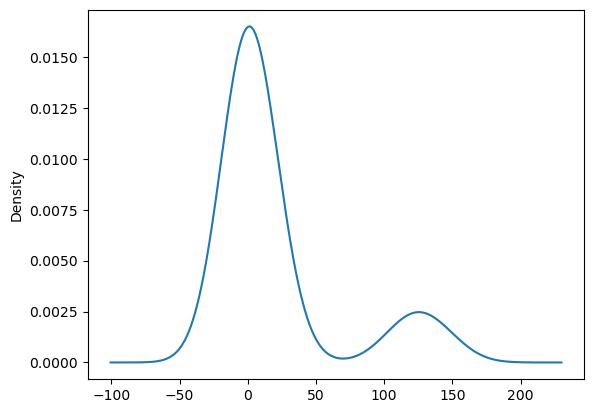

In [75]:
model_SARIMA_fit.resid.plot(kind='kde')

In [76]:
test_data['Predicted_SARIMA']=Spred

C:\Users\harsh\AppData\Local\Temp\ipykernel_19300\1337326670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=Spred


<AxesSubplot:xlabel='Month'>

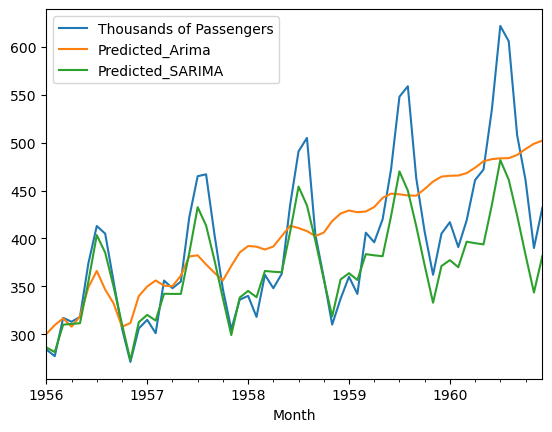

In [77]:
test_data[['Thousands of Passengers','Predicted_Arima','Predicted_SARIMA']].plot()